In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

0.0007970333099365234
0.005955934524536133


(array([1.0000e+00, 1.3000e+01, 5.3000e+01, 2.2100e+02, 6.6000e+02,
        1.9900e+03, 4.3250e+03, 8.3350e+03, 1.2950e+04, 1.6002e+04,
        1.7239e+04, 1.5212e+04, 1.1061e+04, 6.6870e+03, 3.2680e+03,
        1.3820e+03, 4.3200e+02, 1.2900e+02, 3.7000e+01, 3.0000e+00]),
 array([-4.51668867, -4.078904  , -3.64111932, -3.20333464, -2.76554997,
        -2.32776529, -1.88998062, -1.45219594, -1.01441126, -0.57662659,
        -0.13884191,  0.29894277,  0.73672744,  1.17451212,  1.61229679,
         2.05008147,  2.48786615,  2.92565082,  3.3634355 ,  3.80122018,
         4.23900485]),
 <a list of 20 Patch objects>)

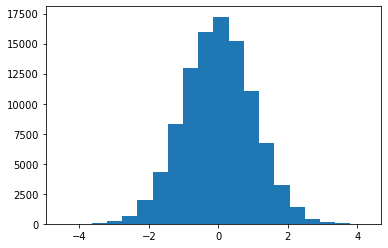

In [7]:
t0 = time.time()
ran = np.random.normal(0,1,10**4)
t1 = time.time()
ran = np.random.normal(0,1,10**5)
t2 = time.time()

print(t1-t0)
print(t2-t0)

plt.hist(ran, bins = 20)


In [60]:
radii = 5.2
#min = - (radii + 0.1)
min = 0
max = radii + 0.1
iterations = 100
tests = 1000

def circle_func(radii, min, max, iterations):
    x_acc, y_acc, x_rej, y_rej = [], [], [], []
    for i in range(iterations):
        x = np.random.uniform(min,max)
        y = np.random.uniform(min,max)

        if np.hypot(x,y) <= radii:
            x_acc.append(x)
            y_acc.append(y)
        else: 
            x_rej.append(x)
            y_rej.append(y)
    area = (len(x_acc)/iterations)*(max**2)*4
    pi = area/(radii**2)
    return area, pi

    

In [62]:
area_list = []
for i in range(tests):
    area = circle_func(radii, min, max, iterations)[0]
    area_list.append(area)



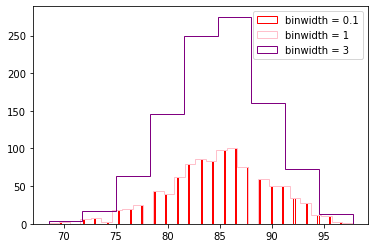

In [80]:
def specify_binwidth(data, binwidth):
    Nbins = int((np.max(data)-np.min(data))/binwidth)
    return Nbins
    

plt.hist(area_list, bins = specify_binwidth(area_list, 0.1), label='binwidth = 0.1', histtype = 'step', color = 'red')
plt.hist(area_list, bins = specify_binwidth(area_list, 1), label='binwidth = 1', histtype = 'step', color = 'pink')
plt.hist(area_list, bins = specify_binwidth(area_list, 3), label='binwidth = 3', histtype = 'step', color = 'purple')
plt.legend(loc='upper right')
plt.show()

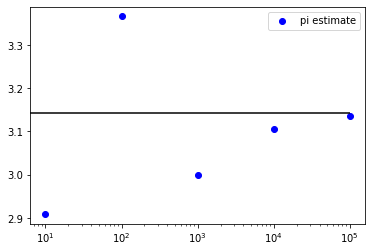

In [77]:
throws = [10, 100, 1000, 10000, 100000]
pi_list = []
for i in throws:
    pi = circle_func(radii, min, max, i)[1]
    pi_list.append(pi)
  
fig, ax = plt.subplots()
ax.scatter(throws,pi_list, label='pi estimate', color = 'b')
ax.hlines(np.pi, 0, np.max(throws))
ax.set_xscale('log')
ax.legend(loc = 'best')
plt.show()